# Emotion detection using Mediapipe data

<strong>Research Aim:</strong>
This research assesses the effectiveness of emotion classification using kinematic models, comparing feature sets retrieved from Mediapipe Pose landmarks and Yolov8 Pose keypoints. The goal is to identify which method provides better features for emotion recognition, by measuring and comparing the accuracy of the trained models.

<strong>Research Question:</strong>
How does the performance of classifying emotions vary when trained with different feature sets: one extracted from the Mediapipe Pose model and the other from the Yolov8 Pose model?

<strong>Null Hypothesis (H0):</strong>
There is no significant difference in the performance of classifying emotion when trained with feature sets extracted from the Mediapipe Pose model compared to the Yolov8 Pose model. 

To classify emotions, this study will utilize Ekman's six basic emotions. The performance evaluation will be based on accuracy measurements to determine if there is a statistically significant difference.

### Prepare the data with the deduced numerical features
In a different file I used Mediapipes Pose and Yolov8 Pose to extract the landmarks/keypoints from a dataset with images of postures and converted those to features, using a method described by Siam et al. (2022). The images were retrieved from a research by Thoma et al. (2012).
- postures_media.csv - is extracted using Mediapipes Pose
- postures_yolo.csv - is extracte using Yolov8 Pose

In [26]:
import pandas as pd

#Mediapipe Pose
mediaPoseDf=pd.read_csv('datasets/postures_media.csv')
display(mediaPoseDf.head())

,Emotion,Gender,Image,Cor_cat_rate,Med_nat_rate,Facing,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,Neutral,male,001mN_90.jpg,0.79,3.0,Frontal,0.193374,2.458266,1.353969,0.379264,...,1.678455,4.583256,1.495213,1.613605,3.122227,3.241281,3.321390,6.062421,2.821777,0.193247
1,Neutral,male,004mN_90.jpg,0.68,3.0,Frontal,0.168586,2.953391,0.989055,0.243233,...,1.682779,4.580317,1.500050,1.554993,3.198850,3.110548,3.379891,6.100108,2.618048,0.316004
2,Neutral,male,010mN_90.jpg,0.84,3.0,Frontal,1.222581,1.389088,4.328553,5.253339,...,1.795110,4.571782,1.331071,1.423613,3.232149,3.258707,3.543676,6.065770,3.107304,0.291282
3,Neutral,male,018mN_90.jpg,0.95,5.0,Frontal,5.877678,3.732041,3.706149,0.335863,...,1.687168,4.496821,1.492566,1.654648,3.193813,3.105696,3.206148,5.994447,2.791037,0.439716
4,Neutral,male,021mN_90.jpg,0.79,4.0,Frontal,5.758711,3.750057,3.372530,0.454171,...,1.756696,4.599367,1.597522,1.754292,3.041525,3.450404,3.664427,5.871820,1.941982,0.329254


After capturing their images, Thoma et al. (2012) validated the depicted emotions by having nineteen undergraduate and graduate students evaluate the perceived emotions in these images. This validation resulted in the variable "Cor_cat_rate", the Rate of Correct categorizations. It's worthwhile to explore the distributions of this variable.

<em>Result:</em></br>
After running the code I concluded to use a 'Cor_cat_rate' of at least 0.6, filtering out images in which the emotion was often not recognized. Increasing the threshold to 0.8 resulted in a 25% reduction in the dataset size, compared to the 0.6 threshold, while also leading to a decrease in accuracy.

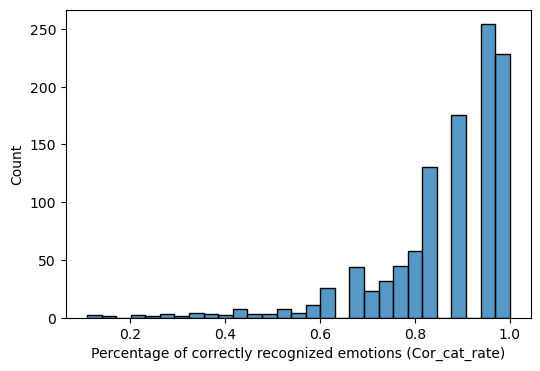

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting with Seaborn, since this variable is the same in both dataset, only one is checked
plt.figure(figsize=(6, 4))
sns.histplot(mediaPoseDf['Cor_cat_rate'])
plt.xlabel("Percentage of correctly recognized emotions (Cor_cat_rate)")
# Show plot
plt.show()

In [28]:
# Filter out all results below 0.6
mediaPoseDf=mediaPoseDf[mediaPoseDf['Cor_cat_rate']>0.6]
mediaPoseDf.shape[0]

1015

Thoma et al. (2012) also asked the participants in the validation study how natural the depicted emotions were. This validation resulted in the variable "Med_nat_rate", the medium naturalness rate. The distributions of this variable is also explored

<em>Result:</em></br>
Since I did want to filter out images which were not perceived as natural, but at the same time not losing too much data, I set the treshold to 2.5.

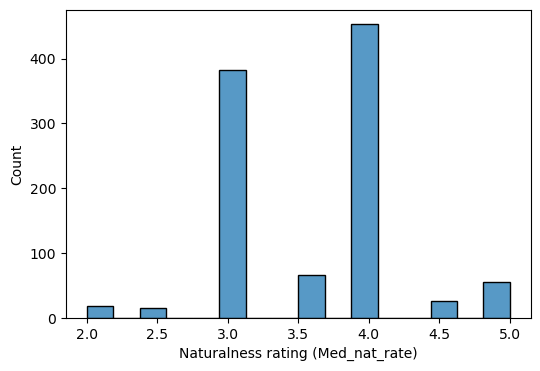

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting with Seaborn, since this variable is the same in both dataset, only one is checked
plt.figure(figsize=(6, 4))
sns.histplot(mediaPoseDf['Med_nat_rate'])
plt.xlabel("Naturalness rating (Med_nat_rate)")
# Show plot
plt.show()

In [30]:
# Filter out all results below 2.5
mediaPoseDf=mediaPoseDf[mediaPoseDf['Med_nat_rate']>2.5]
mediaPoseDf.shape[0]

982

Encoding the target value into numbers.

In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode the target value
le = LabelEncoder()
mediaPoseDf['Emotion'] = le.fit_transform(mediaPoseDf['Emotion'])
mediaPoseDf.head()

,Emotion,Gender,Image,Cor_cat_rate,Med_nat_rate,Facing,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,4,male,001mN_90.jpg,0.79,3.0,Frontal,0.193374,2.458266,1.353969,0.379264,...,1.678455,4.583256,1.495213,1.613605,3.122227,3.241281,3.321390,6.062421,2.821777,0.193247
1,4,male,004mN_90.jpg,0.68,3.0,Frontal,0.168586,2.953391,0.989055,0.243233,...,1.682779,4.580317,1.500050,1.554993,3.198850,3.110548,3.379891,6.100108,2.618048,0.316004
2,4,male,010mN_90.jpg,0.84,3.0,Frontal,1.222581,1.389088,4.328553,5.253339,...,1.795110,4.571782,1.331071,1.423613,3.232149,3.258707,3.543676,6.065770,3.107304,0.291282
3,4,male,018mN_90.jpg,0.95,5.0,Frontal,5.877678,3.732041,3.706149,0.335863,...,1.687168,4.496821,1.492566,1.654648,3.193813,3.105696,3.206148,5.994447,2.791037,0.439716
4,4,male,021mN_90.jpg,0.79,4.0,Frontal,5.758711,3.750057,3.372530,0.454171,...,1.756696,4.599367,1.597522,1.754292,3.041525,3.450404,3.664427,5.871820,1.941982,0.329254


### Correlation check
 I first created an overview of all variables and their correlation and after a first analysis zoomed in on certain interesting variables. The correlation between the individual angles and the target variable Emotion is very low. However, it was taken into consideration when one out of 2 variable was removed, I removed the one that is less correlated with the target variable.

<em>Result (see paper for explanation with pictures):</em></br>
- Angles 0 and 1 both define angles of the pulse, the same holds for the other pulse: angles 3 and 4. I decided to remove angles 0 and 3.

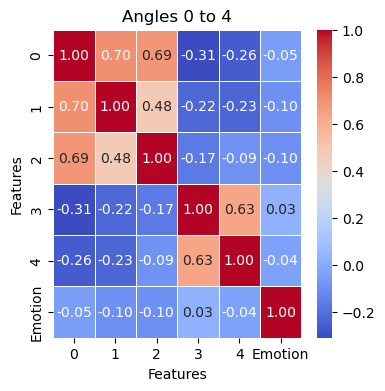

In [32]:
#first check the correlation for the mediaPose dataset
corr_matrix1 = mediaPoseDf[['0','1','2','3','4','Emotion']].corr(method='pearson')

# Plotting the correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Angles 0 to 4')
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


<em>Result (see paper for explanation with pictures):</em></br>
- Angles 8 and 9 both define the torso, I decided to remove angle 8
- Angles 10,11,12,13 all define the lower part of the torso and their connection to the legs. I decide to remove 10 and 11, since the angels 12 and 13 define the position of the upper legs.

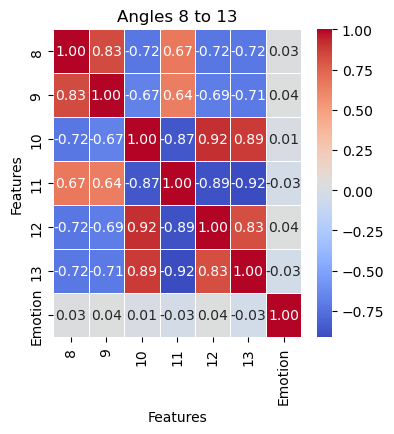

In [33]:
#first check the correlation for the mediaPose dataset
corr_matrix1 = mediaPoseDf[['8','9','10','11','12','13','Emotion']].corr(method='pearson')

# Plotting the correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Angles 8 to 13')
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


<em>Result (see paper for explanation with pictures):</em></br>
- Angles 16 and 17 determine the connection with the footh and width of the food, the same for 18 and 19, but the other leg. I decided to remove 17 and 19 which determine the width of the foot.

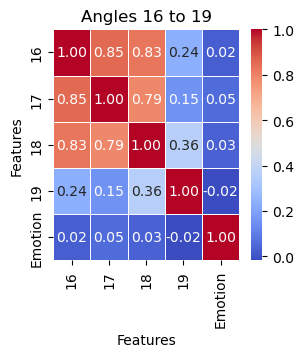

In [34]:
#first check the correlation for the mediaPose dataset
corr_matrix1 = mediaPoseDf[['16','17','18','19','Emotion']].corr(method='pearson')

# Plotting the correlation matrix
plt.figure(figsize=(3, 3))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Angles 16 to 19')
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


Below the result of the analysis above, dropping all the highly correlated features. Furthermore I dropped:
- the 'Image' variable, since it is not relevant
- the 'Facing' variable, since it is correlated with many of the angles

In [35]:
#filter out the variable with high correlation and also the irrelevant variables: Facing and Image
mediaPoseDf2 = mediaPoseDf.drop(['0','3','8','10','11','17','19','Facing','Image'], axis=1)
mediaPoseDf2.head()

,Emotion,Gender,Cor_cat_rate,Med_nat_rate,1,2,4,5,6,7,9,12,13,14,15,16,18
0,4,male,0.79,3.0,2.458266,1.353969,2.638709,2.762227,4.044197,0.418107,4.765062,1.495213,1.613605,3.122227,3.241281,3.321390,2.821777
1,4,male,0.68,3.0,2.953391,0.989055,2.647406,2.989637,4.385866,0.363598,4.787551,1.500050,1.554993,3.198850,3.110548,3.379891,2.618048
2,4,male,0.84,3.0,1.389088,4.328553,3.001864,2.084118,5.715148,0.603705,4.921594,1.331071,1.423613,3.232149,3.258707,3.543676,3.107304
3,4,male,0.95,5.0,3.732041,3.706149,2.443878,2.416664,5.989658,0.496369,4.898186,1.492566,1.654648,3.193813,3.105696,3.206148,2.791037
4,4,male,0.79,4.0,3.750057,3.372530,2.518399,1.825466,6.116760,6.245429,4.901217,1.597522,1.754292,3.041525,3.450404,3.664427,1.941982


Standardize all numerical values and create Dummies for Gender and Facing.

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate numerical
numerical_cols = mediaPoseDf2.select_dtypes(include=['int64', 'float64']).columns

# Standardize numerical columns
scaler = StandardScaler()
mediaPoseDf2[numerical_cols] = scaler.fit_transform(mediaPoseDf2[numerical_cols])

#create Dummies for the categorical data
dummies = pd.get_dummies(mediaPoseDf2['Gender'])
mediaPoseDf2 = pd.concat([mediaPoseDf2, dummies], axis=1)

Define X and y, remove Gender variable (since we allready have the dummies)

In [37]:
#create X and y
y = mediaPoseDf2['Emotion']
X=mediaPoseDf2.drop(['Emotion','Gender'], axis=1)

The goal of PCA is to capture as much of the variance in the original data as possible, while at the same time reducing the number of features. We will first plot the variance of each component (percentage) and the cumulative variance after calculating the components.

<em>Result</em></br>
For this dataset, the first 8 components explain 0.8% to 0.9% of the variance.

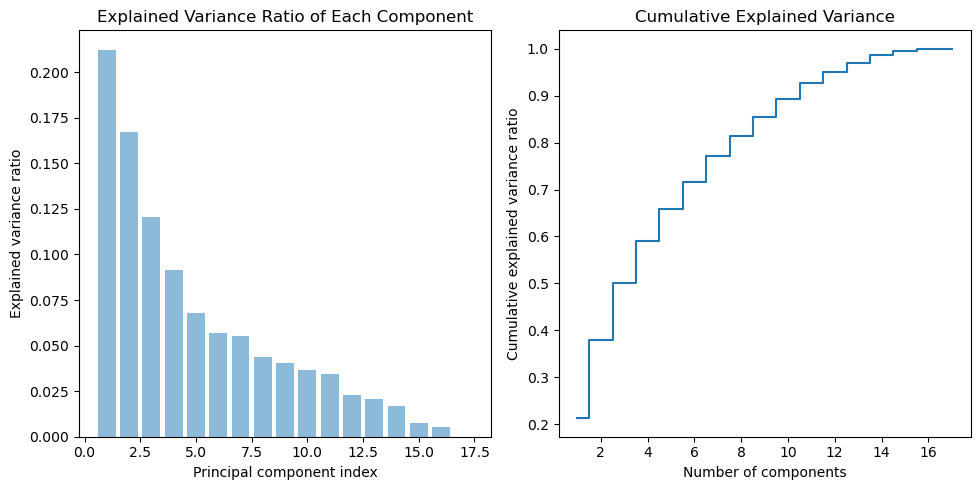

In [38]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=None)  # n_components as None means all components are kept
pca.fit(X)

# Explained variance of each component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting
plt.figure(figsize=(10,5))

# Plotting individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance Ratio of Each Component')

# Plotting cumulative explained variance
plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Number of components')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

In [39]:
# Apply PCA
pca = PCA(n_components=8)  # for example, reduce to 2 components
X = pca.fit_transform(X)

### Training the Data using different models

I compared multiple classifiers and used GridSearchCV to evaluate different parameter combinations, in 10 different folds. 

<em>Result:</em></br>
SVM and KNN performed best, although SVM is more overfitted than knn, a bit slower and less interpretable. Random forest also struglles with overfitting as it has a perfect score on the training set and only half on the test set. Random forest is also the slowest of these classifiers.

In [66]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Define the model
svm = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb  = GaussianNB()
lr = LogisticRegression()

# Define the hyperparameters and their possible values for SVM
param_grid_svm = {
    'C':range(1, 5, 1),
    'gamma':np.arange(0.01, 0.1, 0.02),
    'kernel':['linear', 'rbf', 'poly']
}

# Define the hyperparameters and their possible values for KNN
param_grid_knn = {
    'n_neighbors':range(3, 14, 2)
}

# Define the hyperparameters and their possible values for Logistic Regression
param_grid_rf = {
    'n_estimators':[50,100], 
    'max_depth':[5]
}

# Define the hyperparameters and their possible values for SVM
param_grid_lr = {
    'multi_class':['ovr'],
    'solver':['lbfgs','liblinear']
}

# Create a list of parameter grids
models = [svm,knn,rf,lr]
param_grids = [param_grid_svm,param_grid_knn,param_grid_rf,param_grid_lr]

In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split

#split the data, 80-20 split and stratify is set to y to keep the same balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

best_model=[]
best_score_test=[]
best_score_train=[]

for model, param_grid in zip(models, param_grids):
    
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=1)
    grid_search.fit(X_train, y_train)

    # Use the best estimator to make predictions
    model=grid_search.best_estimator_
    best_model.append(model)
    
    #accuracy on training set
    accuracy_train= model.score(X_train, y_train)
    best_score_train.append(accuracy_train)
    
    #accuracy on test set
    accuracy_test= model.score(X_test, y_test)
    best_score_test.append(accuracy_test)

for bestm, bests_test,bests_train in zip(best_model,best_score_test,best_score_train): 
    print(f'best parameters are:{bestm} and the accuracy on the training set is: {bests_train:.3f} and on the test set: {bests_test:.3f}')


Fitting 10 folds for each of 60 candidates, totalling 600 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
best parameters are:SVC(C=4, gamma=0.08999999999999998) and the accuracy on the training set is: 0.666 and on the test set: 0.503
best parameters are:KNeighborsClassifier(n_neighbors=11) and the accuracy on the training set is: 0.554 and on the test set: 0.503
best parameters are:RandomForestClassifier(max_depth=5) and the accuracy on the training set is: 0.668 and on the test set: 0.462
best parameters are:LogisticRegression(multi_class='ovr') and the accuracy on the training set is: 0.424 and on the test set: 0.442


After comparing all the models seperatly I used a voting classifier.

<em>Result:</em></br>
It did not perform much better than KNN or SVM and was more overfitted.

In [138]:
# Define the model
svm = SVC(C=4, gamma=0.09)
knn = KNeighborsClassifier(n_neighbors=11)
rf = RandomForestClassifier(max_depth=5)
lr = LogisticRegression(multi_class='ovr')

# Create a VotingClassifier with the individual classifiers
voting = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('rf', rf),('lr', lr)], voting='hard')

voting.fit(X_train, y_train)

# Evaluate the classifier
accuracy_train = voting.score(X_train, y_train)
accuracy_test = voting.score(X_test, y_test)
print(f'The accuracy on the training set is: {accuracy_train:.3f} and on the test set: {accuracy_test:.3f}')

The accuracy on the training set is: 0.617 and on the test set: 0.508


In the next step I continued with KNN and SVM since this gave best results everytime, and added a bagging classifier. I choose bagging instead of boosting since the dataset is small and not to complex. Furthermore a loop was used to average out differences in splitting the data in a training and test set.

<em>Result:</em></br>
SVM performed slightly better on the test set then KNN, but is also more overfitted.

In [152]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc

# this function calculates the optimal value and returns a dataframe with average accuracies
def optimal_model(estimator):
    acc_train = []
    acc_test = []
    cf_reports=[]
    conf_matrices=[]
    rss = list(range(0, 500))

    # Loop through the Random State (RS) values
    for rs in rss:
        # Split the data with everytime a different RS
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)

        # Fit the classifier
        bag = BaggingClassifier(estimator=estimator, n_estimators=50, random_state=42)
        bag.fit(X_train, y_train)

        # Get the accuracies
        accuracy_train = bag.score(X_train, y_train)
        accuracy_test = bag.score(X_test, y_test)
        
        # retrieve the predictions
        y_pred= bag.predict(X_test)
        
        # Mapping from encoded labels (numbers) back to original labels (strings)
        label_mapping = {index: label for index, label in enumerate(le.classes_)}

        # Decoding them back to string labels
        decoded_y_test = [label_mapping[label] for label in y_test]
        decoded_y_pred = [label_mapping[label] for label in y_pred]
        
        #classification report
        cf_report=classification_report(decoded_y_test, decoded_y_pred)
        conf_matrix = confusion_matrix(decoded_y_test, decoded_y_pred)
        
        # Store the accuracies for training en test set for alle RS values
        acc_train.append(accuracy_train)
        acc_test.append(accuracy_test )
        cf_reports.append(cf_report)
        conf_matrices.append(conf_matrix)
        
    #return the accuracies for each RS
    prec_rec_df = pd.DataFrame({'rs': list(range(0, 500)), 'acc_train': acc_train, 'acc_test': acc_test, 'cf_report':cf_reports,'conf_matrix':conf_matrices})
    return prec_rec_df

In [158]:
# this function calculates the optimal value and returns a dataframe with average accuracies
def results_model(modelsDf,title):
    
    #get the mean accuracies
    mean_acc = np.mean(modelsDf['acc_test'])
    mean_acc_t = np.mean(modelsDf['acc_train'])
    
    # Mapping from encoded labels (numbers) back to original labels (strings)
    label_mapping = {index: label for index, label in enumerate(le.classes_)}

    # Find the model with accuracy closest to the mean, set it first to the first model in the list
    min_diff = abs(modelsDf['acc_test'][0] - mean_acc)
    
    # Loop through the Random State (RS) values
    for i, row in modelsDf.iterrows():
        
        diff = abs(row['acc_test'] - mean_acc)
        
        if diff < min_diff:
            min_diff = diff
            cf_report = row['cf_report']
            cf_matrix = row['conf_matrix']
  
    # Print the mean accuracies
    print(f'the mean accuracy on the training set is: {mean_acc_t:.3f} and on the test set: {mean_acc :.3f}\n')  # Compute the average values

    #Retrieve the classification report for the model close to the mean
    print(cf_report)
    
    print(f'\nBelow the confusion matrix, precision and recall values for the maximum RS value\n')
    conf_matrix = cf_matrix 
    
    # Plot the confusion matrix for the model close to the mean
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
    plt.title(title)
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    plt.show()

In [154]:
knn = KNeighborsClassifier(n_neighbors=11)
knn_df=optimal_model(knn)
knn_df.to_csv('datasets/acc_media_knn.csv' ,index=False) 

the mean accuracy on the training set is: 0.566 and on the test set: 0.489

              precision    recall  f1-score   support

       Angry       0.20      0.15      0.17        27
   Disgusted       0.30      0.22      0.26        27
     Fearful       0.52      0.50      0.51        26
       Happy       0.68      0.72      0.70        29
     Neutral       0.63      0.87      0.73        30
         Sad       0.48      0.39      0.43        28
   Surprised       0.41      0.50      0.45        30

    accuracy                           0.49       197
   macro avg       0.46      0.48      0.46       197
weighted avg       0.46      0.49      0.47       197


Below the confusion matrix, precision and recall values for the maximum RS value



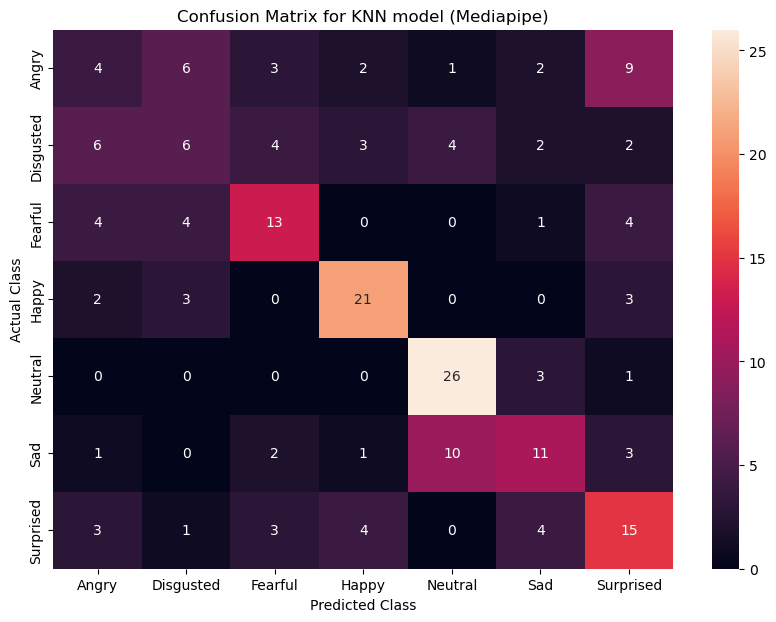

In [159]:
results_model(knn_df, 'Confusion Matrix for KNN model (Mediapipe)')

In [156]:
svm = SVC(C=4, gamma=0.09)
svm_df=optimal_model(svm)
svm_df.to_csv('datasets/acc_media_svm.csv' ,index=False) 

the mean accuracy on the training set is: 0.699 and on the test set: 0.496

              precision    recall  f1-score   support

       Angry       0.25      0.19      0.21        27
   Disgusted       0.20      0.19      0.19        27
     Fearful       0.39      0.50      0.44        26
       Happy       0.83      0.69      0.75        29
     Neutral       0.68      0.83      0.75        30
         Sad       0.52      0.50      0.51        28
   Surprised       0.52      0.53      0.52        30

    accuracy                           0.50       197
   macro avg       0.48      0.49      0.48       197
weighted avg       0.49      0.50      0.49       197


Below the confusion matrix, precision and recall values for the maximum RS value



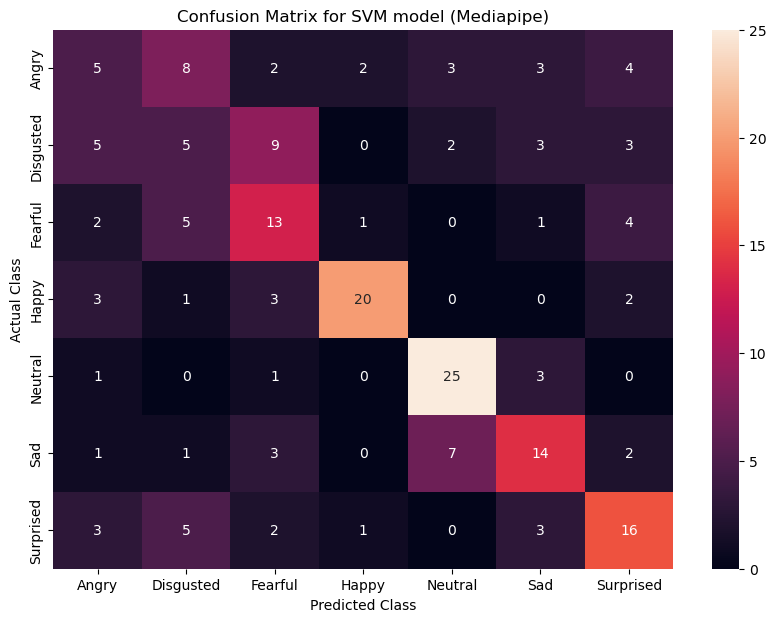

In [160]:
results_model(svm_df, 'Confusion Matrix for SVM model (Mediapipe)')